<a href="https://colab.research.google.com/github/luthfi55/Calculator/blob/master/Tugas_program_2__Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Program 2 - Fuzzy Logic**
Anggota:
- Luthfi Siregar - 1302204013
- Elia Angga - 1302204005
- Christophorus Parikesit Wistara - 1302203023

Structure Model:

*   Fuzzy-Based System : Mamdani Model
*   Linguistik Input : 
    *   Pelayanan
    *   Makanan
    
*   Design System :
    *   Pelayanan :
        *   Fungsi Keanggotaan : Trapesium
        *   Batas Fungsi :
            *   Tidak Puas [0, 25]
            *   Cukup Puas [20, 50]
            *   Puas [40, 80]
            *   Sangat Puas [60, 100]
        *   Grafik : <br/>
            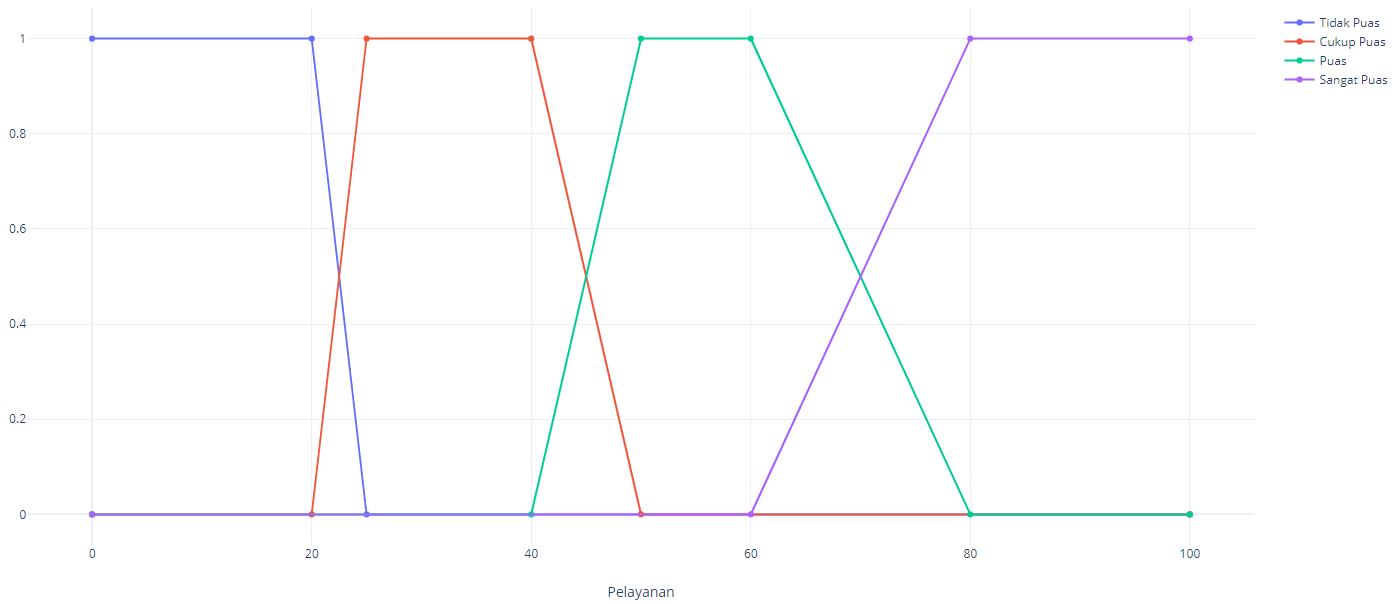
    *   Makanan : 
        *   Fungsi Keanggotaan : Segitiga
        *   Batas Fungsi :
            *   Tidak Enak [0, 5]
            *   Enak [2, 8]
            *   Sangat Enak [5, 10]  
        *   Grafik : <br/>
            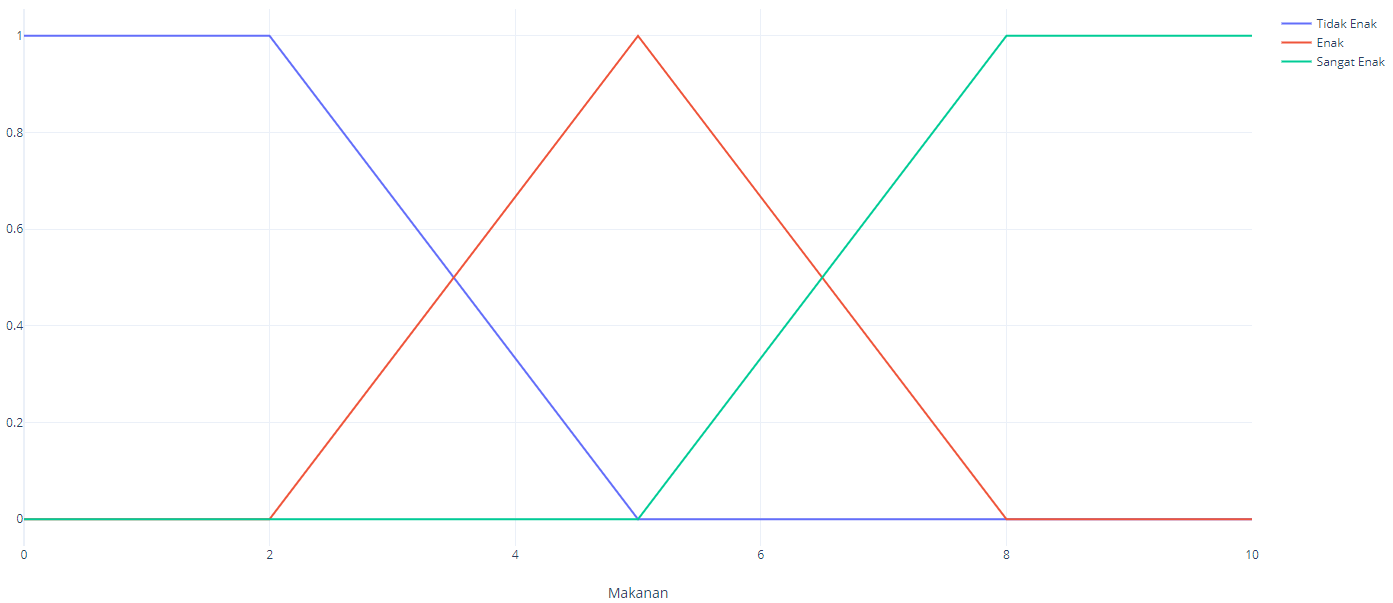
    *   Kelayakan : 
        *   Fungsi Keanggotaan : Segitiga
        *   Batas Fungsi :
            *   rejected [0, 60]
            *   considered [40, 80] 
            *   accepted [60, 100] 
        *   Grafik : <br/>
            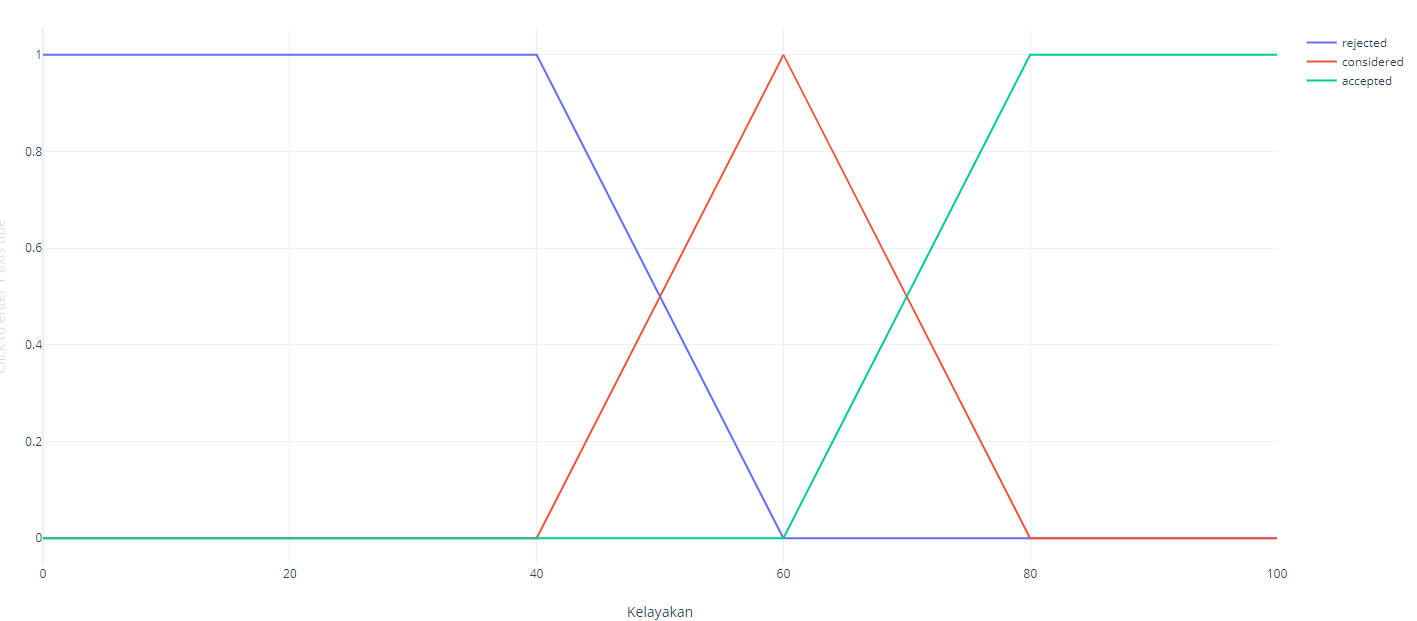
    *   Rules : <br/>
        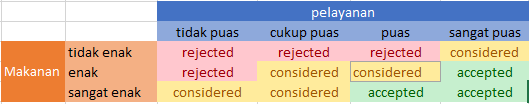<br/>
        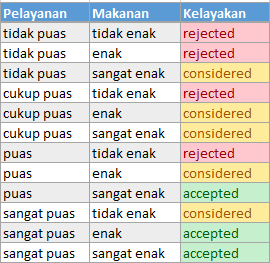





In [ ]:
%load_ext google.colab.data_table
import pandas as pd

# Batas Fungsi untuk setiap Linguistik Input dan kelayakannya
# Kamus Dictionary Trapesium('title' : [a,b,c,d]), Segitiga('title' : [a,b,c])
_listRangePelayanan = ({'tidak_puas' : [0, 0, 20, 25], 'cukup_puas' : [20, 25, 40, 50], 'puas' : [40, 50, 60, 80], 'sangat_puas' : [60, 80, 100, 100]})
_listRangeMakanan = ({'tidak_enak' : [0, 2, 5], 'enak' : [2, 5, 8], 'sangat_enak' : [5, 8, 10]})
_listRangeSeleksi = ({'rejected' : [0, 40, 60], 'considered' : [40, 60, 80], 'accepted' : [60, 80, 100]})

_listRandomDefuzification = (5, 15, 25, 35, 45, 55, 65, 75, 85, 95)

## **Manage Datasets**
mengelolah dataset yang telah diberikan oleh soal

In [ ]:
datasets = pd.read_csv('https://raw.githubusercontent.com/Muvazana/Artificial-Inteligence---Fuzzy-Logic/main/RestoranDataset.csv')
datasets

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


## **Fuzzifikasi**
Managemen proses Fuzzifikasi

In [ ]:
def kiri(x, key, list_range, range_bonus):
  if  x <= list_range[key][1+range_bonus]:
    return 1
  elif x > list_range[key][2+range_bonus]:
    return 0
  else:
    return (list_range[key][2+range_bonus]-x)/(list_range[key][2+range_bonus]-list_range[key][1+range_bonus])

def trapesium(x, key, list_range): 
  if  x <= list_range[key][0] or x > list_range[key][3]:
    return 0
  elif x > list_range[key][0] and x <= list_range[key][1]:
    return (x-list_range[key][0])/(list_range[key][1]-list_range[key][0])
  elif x > list_range[key][1] and x <= list_range[key][2]:
    return 1
  else:
    return (list_range[key][3]-x)/(list_range[key][3]-list_range[key][2])

def segitiga(x, key, list_range):
  if  x <= list_range[key][0] or x >= list_range[key][2]:
    return 0
  elif x > list_range[key][0] and x <= list_range[key][1]:
    return (x-list_range[key][0])/(list_range[key][1]-list_range[key][0])
  else:
    return (list_range[key][2]-x)/(list_range[key][2]-list_range[key][1])

def kanan(x, key, list_range): 
  if  x <= list_range[key][0]:
    return 0
  elif x > list_range[key][1]:
    return 1
  else:
    return (x-list_range[key][0])/(list_range[key][1]-list_range[key][0])

### Pelayanan


In [ ]:
fuzzy_input_pelayanan = []
for i in datasets.index:
  fuzzy_input_pelayanan.append({
      'tidak_puas': kiri(datasets['pelayanan'][i], 'tidak_puas', _listRangePelayanan, 1),
      'cukup_puas': trapesium(datasets['pelayanan'][i], 'cukup_puas', _listRangePelayanan),
      'puas': trapesium(datasets['pelayanan'][i], 'puas', _listRangePelayanan),
      'sangat_puas': kanan(datasets['pelayanan'][i], 'sangat_puas', _listRangePelayanan)
  })


df_fuzzy_input_pelayanan = pd.DataFrame(fuzzy_input_pelayanan)
df_fuzzy_input_pelayanan

,tidak_puas,cukup_puas,puas,sangat_puas
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
95,0.0,1.0,0.0,0.0
96,0.0,1.0,0.0,0.0
97,0.0,1.0,0.0,0.0
98,1.0,0.0,0.0,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Makanan


In [ ]:
fuzzy_input_makanan = []
for i in datasets.index:
  fuzzy_input_makanan.append({
      'tidak_enak': kiri(datasets['makanan'][i], 'tidak_enak', _listRangeMakanan, 0),
      'enak': segitiga(datasets['makanan'][i], 'enak', _listRangeMakanan),
      'sangat_enak': kanan(datasets['makanan'][i], 'sangat_enak', _listRangeMakanan)
  })

df_fuzzy_input_makanan = pd.DataFrame(fuzzy_input_makanan)
df_fuzzy_input_makanan

## **Inferensi**
Managemen proses Inferensi

In [ ]:
rules = {'rejected': [
                      ['tidak_puas', 'tidak_enak'],
                      ['tidak_puas', 'enak'],
                      ['cukup_puas', 'tidak_enak'],
                      ['puas', 'tidak_enak']
                      ],
         'considered': [
                      ['tidak_puas', 'sangat_enak'],
                      ['cukup_puas', 'enak'],
                      ['cukup_puas', 'sangat_enak'],
                      ['puas', 'enak'],
                      ['sangat_puas', 'tidak_enak']
                      ],
         'accepted': [
                      ['puas', 'sangat_enak'],
                      ['sangat_puas', 'enak'],
                      ['sangat_puas', 'sangat_enak']
                      ]
         }

def inferensi(dicti_pelayanan, dicti_makanan):
  temp_kelayakan = {}
  for key, value in rules.items():
    kelayakan_values = []
    for item in value:
      kelayakan_values.append(min(dicti_pelayanan[item[0]], dicti_makanan[item[1]]))
    temp_kelayakan[key] = max(kelayakan_values)

  return temp_kelayakan

fuzzy_output = []
for i in datasets.index:
  fuzzy_output.append(inferensi(fuzzy_input_pelayanan[i],fuzzy_input_makanan[i]))
  
df_kelayakan = pd.DataFrame(fuzzy_output)
df_kelayakan

NameError: ignored

## **Defuzzifikasi**
Managemen proses Defuzzifikasi

In [ ]:
def defuzification(kelayakan_item):
  #create membership for defuzification
  membership_defuzification_1 = []
  for item in _listRandomDefuzification:
    rejected = kiri(item, 'rejected', _listRangeSeleksi, 0) 
    considered = segitiga(item, 'considered', _listRangeSeleksi)
    accepted = kanan(item, 'accepted', _listRangeSeleksi)

    rejected = kelayakan_item['rejected'] if rejected > kelayakan_item['rejected'] else rejected
    considered = kelayakan_item['considered'] if considered > kelayakan_item['considered'] else considered
    accepted = kelayakan_item['accepted'] if accepted > kelayakan_item['accepted'] else accepted

    membership_defuzification_1.append(max(rejected, considered, accepted))

  membership_defuzification_2 = []
  for i in range(len(_listRandomDefuzification)):
    membership_defuzification_2.append(_listRandomDefuzification[i]*membership_defuzification_1[i])

  return sum(membership_defuzification_2)/sum(membership_defuzification_1)


crisp_output = []
for item in fuzzy_output:
  crisp_output.append(round(defuzification(item), 2))

datasets['fuzzy_score'] = crisp_output
datasets

,id,pelayanan,makanan,fuzzy_score
0,1,58,7,75.86
1,2,54,1,25.50
2,3,98,2,60.00
3,4,52,4,43.21
4,5,11,4,27.09
...,...,...,...,...
95,96,30,1,25.50
96,97,25,3,33.43
97,98,27,10,60.00
98,99,8,6,33.43


## **Export to Exel**
Mengambil 10 besar teratas dengan parameter "fuzzy_score". Setelah itu Export to Exel

In [ ]:
datasets['fuzzy_score'] = crisp_output
crisp_output_to_xls = (datasets.sort_values(by=['fuzzy_score'], ascending=False).head(10))['id']
crisp_output_to_xls.to_excel('peringkat.xls', index=False)
crisp_output_to_xls
# compression_opts = dict(method='zip', archive_name='Crisp_Output.csv')
# crisp_output_to_csv.to_csv('Crisp_Output.zip', index=False, compression=compression_opts)

26    27
78    79
5      6
68    69
41    42
23    24
24    25
6      7
21    22
69    70
Name: id, dtype: int64